## 1. Importing libraries and data

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import plotly.express as px

In [85]:
%matplotlib inline

In [86]:
path = r'C:\Users\sdaon\Documents\Global Air Pollution Dataset'

In [87]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'global air pollution dataset_cleaned.csv'), index_col = False)

In [88]:
df.head(15)

,Unnamed: 0,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


In [89]:
df.columns

Index(['Unnamed: 0', 'Country', 'City', 'AQI Value', 'AQI Category',
       'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category'],
      dtype='object')

In [90]:
#remove unamed columns
df = df.drop(columns = ['Unnamed: 0'])

In [91]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [92]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [93]:
# I get a copy of the dataframe before I drop the columns. I will add clusters to data and will use in future anlysis.
df_to_save = df

In [94]:
#Deleting non-numerical columns
df = df.drop(columns=['Country','City','AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'])

In [95]:
df.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6


In [96]:
# Check for missing values

df.isnull().sum()

AQI Value          0
CO AQI Value       0
Ozone AQI Value    0
NO2 AQI Value      0
PM2.5 AQI Value    0
dtype: int64

## 2.Standardizing data

In [97]:
# Define a scaling object

scaler = StandardScaler()


In [98]:
# Create an object containing an array of standardized data

df_standard = scaler.fit_transform(df)

In [99]:
df_standard

array([[-0.37872215, -0.20394407,  0.02713186, -0.58405492, -0.3248223 ],
       [-0.55615368, -0.20394407, -1.07075736, -0.39471812, -0.50645488],
       [-0.11257486, -0.20394407,  0.1333792 , -0.20538132, -0.05237342],
       ...,
       [-0.39646531, -0.20394407, -0.46868908, -0.39471812, -0.34298555],
       [-0.02385909, -0.20394407,  0.3104581 , -0.20538132,  0.03844287],
       [-0.04160224, -0.20394407,  0.09796342, -0.58405492,  0.02027961]])

## 3. The elbow technique

In [100]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [101]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\sdaon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdaon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdaon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdaon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdaon\anaconda3\lib\site-packages\sklearn\clust

[-162078390.7207293,
 -66910060.76727529,
 -41626155.90326214,
 -30061501.229813334,
 -21566361.29697391,
 -17415495.726962224,
 -14606772.42798601,
 -13162865.837710887,
 -12088167.580544984]

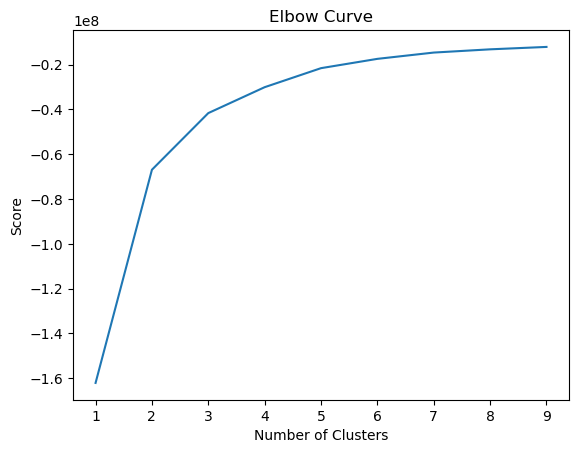

In [102]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### There's a jump from two to three on the x-axis. After that, the curve goes straight. Based on that the optimal count of the clusters is 3.

###  5. K-means clustering

In [103]:
# create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [104]:
# Fit the kmeans object with our standardized data

kmeans.fit(df)

C:\Users\sdaon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [105]:
df['clusters'] = kmeans.fit_predict(df)
df_to_save['clusters'] = kmeans.fit_predict(df)

C:\Users\sdaon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdaon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [106]:
df.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,clusters
0,51,1,36,0,51,0
1,41,1,5,1,41,0
2,66,1,39,2,66,0
3,34,1,34,0,20,0
4,22,0,22,0,6,0


In [107]:
df['clusters'].value_counts()

0    19041
1     3800
2      194
Name: clusters, dtype: int64

In [108]:
# Save clustered data to use in future analysis
df_to_save.to_csv(os.path.join(path, 'Data','Prepared Data', 'air_p_dataset_cleaned_cluster.csv'))

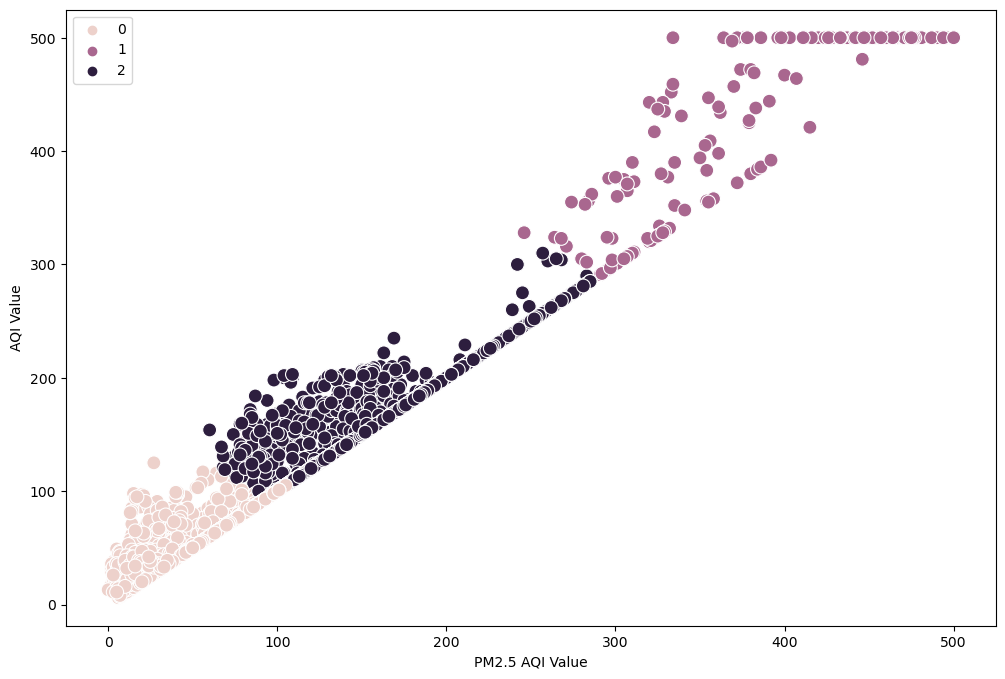

In [109]:
# Plot the clusters for the "PM2.5 AQI Value" and "AQI Valu" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['PM2.5 AQI Value'], y=df['AQI Value'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('PM2.5 AQI Value') # Label x-axis.
plt.ylabel('AQI Value') # Label y-axis.
plt.show()

### The cluster 2 (black dots) indicates that the highe AQI are showing high accuracy between PM2.5 value. Also the cluster 1 (yellow dots) approves that.

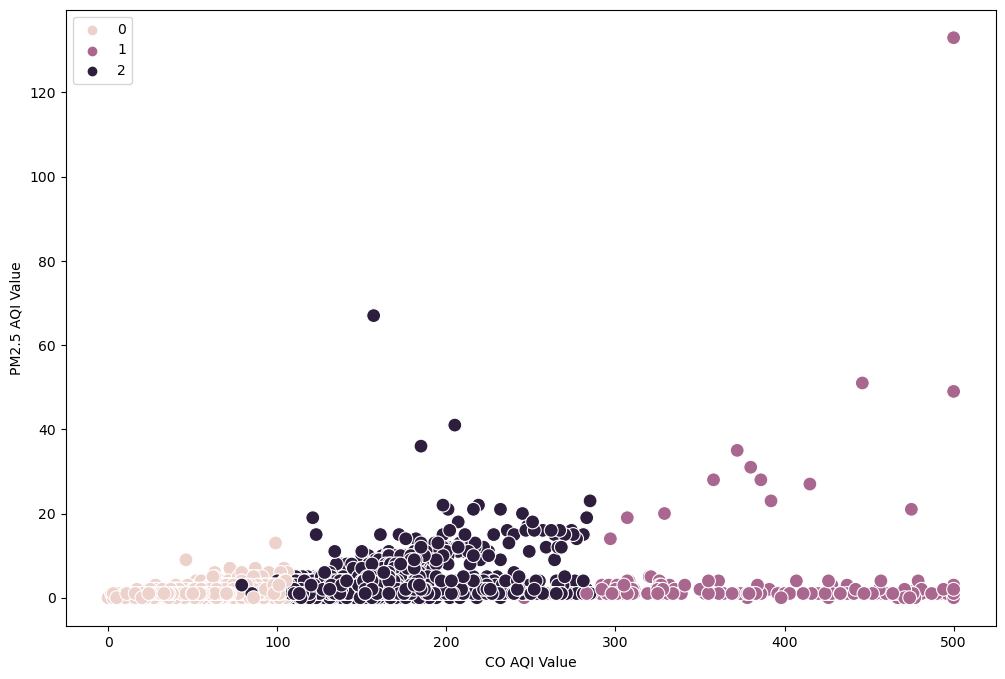

In [110]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['PM2.5 AQI Value'], y=df['CO AQI Value'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('CO AQI Value') 
plt.ylabel('PM2.5 AQI Value') 
plt.show()

### While the cluster 1 (red dots) show some colleration between PM2.5 and CO values, cluster 0 (yellow dots) and cluster 2 (black dots) doesn't show much collaration. It is obvious to see that while the PM2.5 particals are high in the air, CO value can be low.

In [111]:
#Creating flags for diffent clusters and creating a column 'cluster'
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'red'
df.loc[df['clusters'] == 0, 'cluster'] = 'yellow'

In [112]:
df.groupby('cluster').agg({'AQI Value':['mean', 'median'], 
                         'CO AQI Value':['mean', 'median'], 
                         'Ozone AQI Value':['mean', 'median'],
                          'NO2 AQI Value':['mean', 'median'],
                          'PM2.5 AQI Value':['mean', 'median']})

AQI Value        CO AQI Value        Ozone AQI Value         \
               mean median         mean median            mean median   
cluster                                                                 
black    438.422680  500.0     3.793814    1.0       59.768041   47.0   
red      156.931053  156.0     2.931579    2.0       62.101579   40.0   
yellow    51.734048   50.0     1.041227    1.0       29.621974   29.0   

        NO2 AQI Value        PM2.5 AQI Value         
                 mean median            mean median  
cluster                                              
black        3.989691    1.0      399.505155  400.0  
red          5.550263    2.0      152.807632  154.0  
yellow       2.583478    1.0       48.766241   50.0

### The mean and median of the clusters shows further investigation about the relationships between the columns could be usefull. This can indicate possible risk increase.

### These results can be used for future analysis. There are many data points that could be generated from these resuls and combined with new variables to indicated the risk of the countries. While we are able to investigate the collaration within the clusters, we can also add more variables like Population to understand the human factor on the AQI. 

In [113]:
df.to_csv(os.path.join(path, 'Data','Prepared Data', 'air_p_dataset_cleaned_cluster_latest.csv'))